# 🏥 Stroke Prediction using Support Vector Regression (SVR)

**Project Overview:**
- Predict stroke values using Support Vector Regression
- Display comprehensive evaluation metrics including R² Score
- Visualize model performance with multiple plots

---

## 📚 Section 1: Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Plot styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"\nLibrary Versions:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

✓ All libraries imported successfully!

Library Versions:
Pandas: 2.3.3
NumPy: 2.4.1


## 📁 Section 2: Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

print("✓ Dataset loaded successfully!\n")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

✓ Dataset loaded successfully!

Dataset Shape: (94, 2)
Total Records: 94
Total Features: 2


In [3]:
# Display first few rows
print("\n📊 First 10 rows of the dataset:")
df.head(10)


📊 First 10 rows of the dataset:


,x,y
0,168.181818,160.840244
1,187.878788,159.413657
2,207.575758,157.136809
3,227.272727,159.357847
4,246.969697,157.542862
5,266.666667,157.735207
6,286.363636,159.347561
7,306.060606,155.234046
8,325.757576,155.807740
9,345.454545,158.329970


In [4]:
# Display last few rows
print("\n📊 Last 10 rows of the dataset:")
df.tail(10)


📊 Last 10 rows of the dataset:


,x,y
84,1822.727273,174.421428
85,1842.424242,176.361532
86,1862.121212,173.217106
87,1881.818182,174.162858
88,1901.515152,174.230935
89,1921.212121,172.285091
90,1940.909091,176.001331
91,1960.606061,176.128171
92,1980.303030,175.813257
93,2000.000000,175.530826


In [5]:
# Dataset info
print("\n📋 Dataset Information:")
df.info()


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       94 non-null     float64
 1   y       94 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


## 🔍 Section 3: Exploratory Data Analysis (EDA)

In [6]:
# Check for missing values
print("\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal Missing Values: {missing_values.sum()}")


🔍 Missing Values Check:
x    0
y    0
dtype: int64

Total Missing Values: 0


In [7]:
# Statistical summary
print("\n📊 Statistical Summary:")
df.describe()


📊 Statistical Summary:


,x,y
count,94.000000,94.000000
mean,1084.090909,166.576111
std,537.321877,5.861601
min,168.181818,155.234046
25%,626.136364,161.236377
50%,1084.090909,166.508064
75%,1542.045455,171.784967
max,2000.000000,176.361532


In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")


🔄 Duplicate Rows: 0


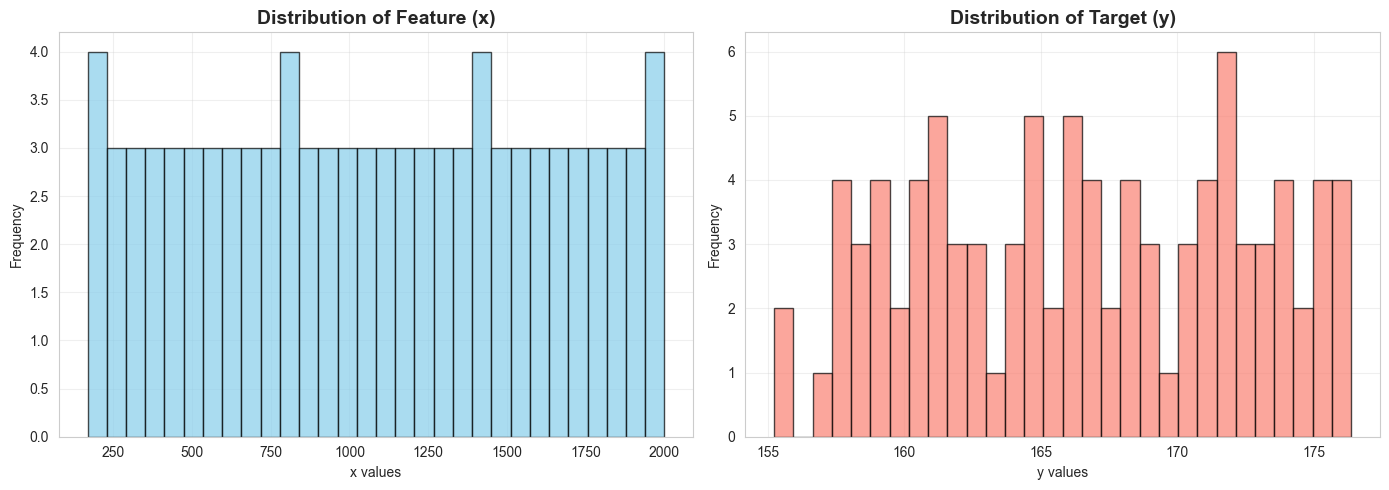

In [9]:
# Visualize data distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Feature distribution
axes[0].hist(df['x'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Feature (x)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x values')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Target distribution
axes[1].hist(df['y'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Target (y)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('y values')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

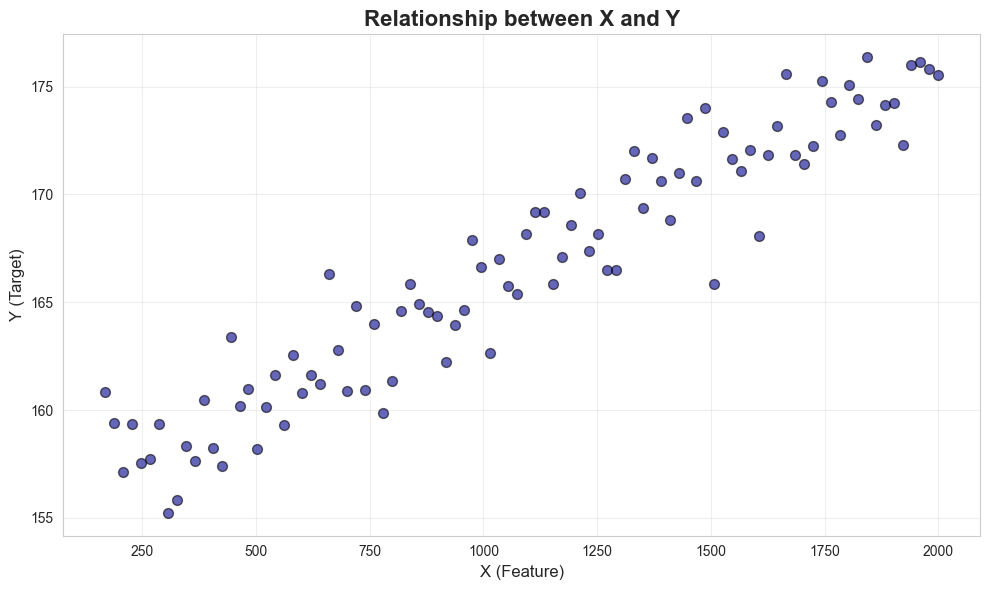

In [10]:
# Scatter plot: x vs y
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='darkblue', alpha=0.6, edgecolors='black', s=50)
plt.title('Relationship between X and Y', fontsize=16, fontweight='bold')
plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('Y (Target)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


📈 Correlation Matrix:
          x         y
x  1.000000  0.950549
y  0.950549  1.000000


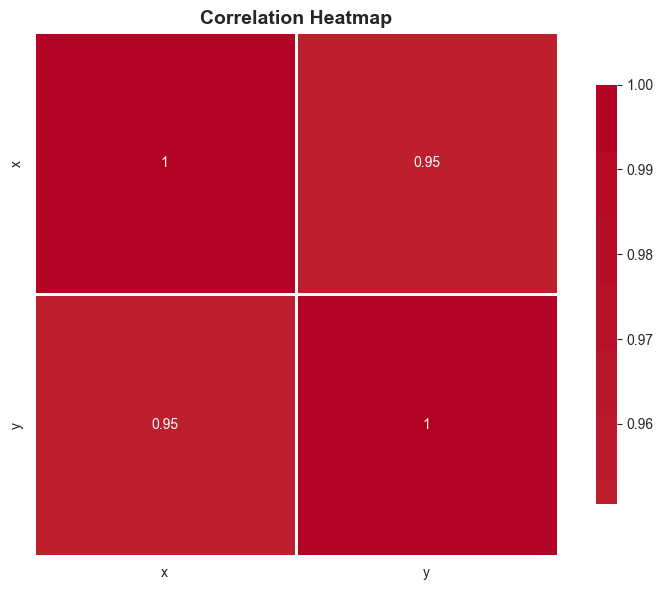

In [11]:
# Correlation analysis
correlation = df.corr()
print("\n📈 Correlation Matrix:")
print(correlation)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 🧹 Section 4: Data Preprocessing

In [12]:
# Separate features and target
X = df[['x']].values
y = df['y'].values

print("✓ Features and target separated successfully!")
print(f"\nFeature shape: {X.shape}")
print(f"Target shape: {y.shape}")

✓ Features and target separated successfully!

Feature shape: (94, 1)
Target shape: (94,)


In [13]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✓ Data split successfully!")
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTrain-Test Split Ratio: 80-20")

✓ Data split successfully!

Training set size: 75 samples
Testing set size: 19 samples

Train-Test Split Ratio: 80-20


In [14]:
# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

print("✓ Feature scaling completed!")
print(f"\nScaling method: StandardScaler (mean=0, std=1)")

✓ Feature scaling completed!

Scaling method: StandardScaler (mean=0, std=1)


## 🤖 Section 5: Model Training - Support Vector Regression (SVR)

In [15]:
# Create and train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

print("🚀 Training SVR Model...\n")
svr_model.fit(X_train_scaled, y_train_scaled)
print("✓ Model training completed!")

print(f"\nModel Parameters:")
print(f"Kernel: {svr_model.kernel}")
print(f"C (Regularization): {svr_model.C}")
print(f"Epsilon: {svr_model.epsilon}")
print(f"Support Vectors: {svr_model.n_support_}")

🚀 Training SVR Model...

✓ Model training completed!

Model Parameters:
Kernel: rbf
C (Regularization): 1.0
Epsilon: 0.1
Support Vectors: [64]


## 📈 Section 6: Model Evaluation & Comprehensive Metrics

In [16]:
# Make predictions
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

print("✓ Predictions completed!")

✓ Predictions completed!


In [17]:
# Calculate all evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display metrics in a beautiful format
print("="*60)
print("🎯 MODEL EVALUATION METRICS")
print("="*60)
print(f"\n📊 R² Score (Coefficient of Determination): {r2:.6f}")
print(f"   → Explains {r2*100:.2f}% of the variance in the target variable")
print(f"\n📏 Mean Absolute Error (MAE):              {mae:.6f}")
print(f"   → Average absolute difference between actual and predicted")
print(f"\n📐 Mean Squared Error (MSE):               {mse:.6f}")
print(f"   → Average of squared differences")
print(f"\n📉 Root Mean Squared Error (RMSE):         {rmse:.6f}")
print(f"   → Square root of MSE (same unit as target)")
print(f"\n📊 Mean Absolute Percentage Error (MAPE):  {mape:.4f}%")
print(f"   → Average percentage difference")
print("\n" + "="*60)

# Model performance interpretation
if r2 >= 0.9:
    performance = "Excellent! 🌟"
elif r2 >= 0.7:
    performance = "Good! 👍"
elif r2 >= 0.5:
    performance = "Moderate 👌"
else:
    performance = "Needs Improvement 📈"

print(f"\n🎯 Model Performance: {performance}")
print("="*60)

🎯 MODEL EVALUATION METRICS

📊 R² Score (Coefficient of Determination): 0.946025
   → Explains 94.60% of the variance in the target variable

📏 Mean Absolute Error (MAE):              1.125687
   → Average absolute difference between actual and predicted

📐 Mean Squared Error (MSE):               1.781650
   → Average of squared differences

📉 Root Mean Squared Error (RMSE):         1.334785
   → Square root of MSE (same unit as target)

📊 Mean Absolute Percentage Error (MAPE):  0.6777%
   → Average percentage difference


🎯 Model Performance: Excellent! 🌟


In [18]:
# Create a metrics dataframe for better visualization
metrics_df = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE', 'MAPE (%)'],
    'Value': [r2, mae, mse, rmse, mape]
})

print("\n📋 Metrics Summary Table:")
print(metrics_df.to_string(index=False))


📋 Metrics Summary Table:
  Metric    Value
R² Score 0.946025
     MAE 1.125687
     MSE 1.781650
    RMSE 1.334785
MAPE (%) 0.677695


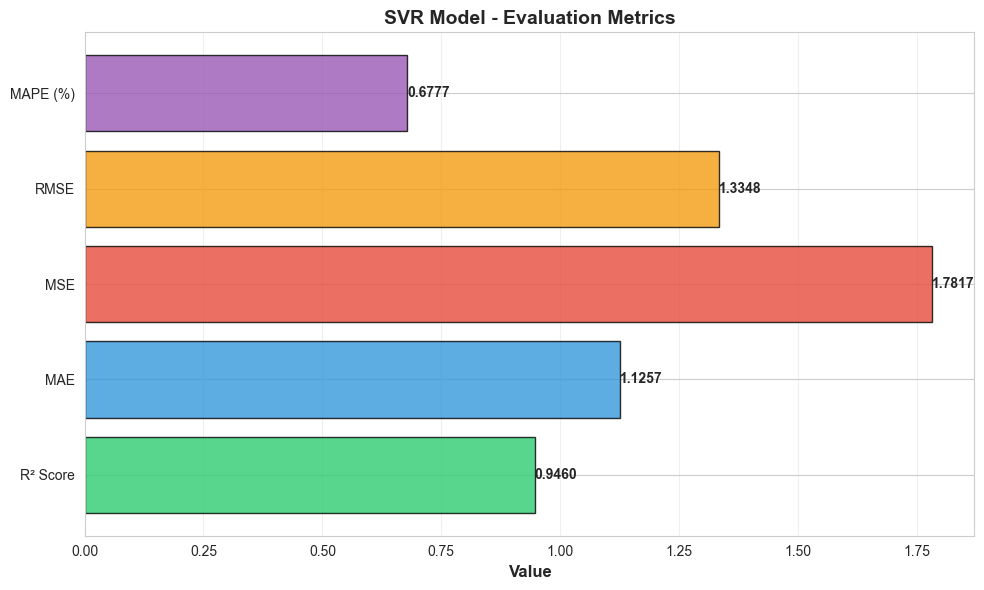

In [19]:
# Visualize metrics
fig, ax = plt.subplots(figsize=(10, 6))

metrics_names = ['R² Score', 'MAE', 'MSE', 'RMSE', 'MAPE (%)']
metrics_values = [r2, mae, mse, rmse, mape]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']

bars = ax.barh(metrics_names, metrics_values, color=colors, edgecolor='black', alpha=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, metrics_values)):
    ax.text(value, bar.get_y() + bar.get_height()/2, 
            f'{value:.4f}', va='center', ha='left', fontweight='bold', fontsize=10)

ax.set_xlabel('Value', fontsize=12, fontweight='bold')
ax.set_title('SVR Model - Evaluation Metrics', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 📉 Section 7: Model Performance Visualizations

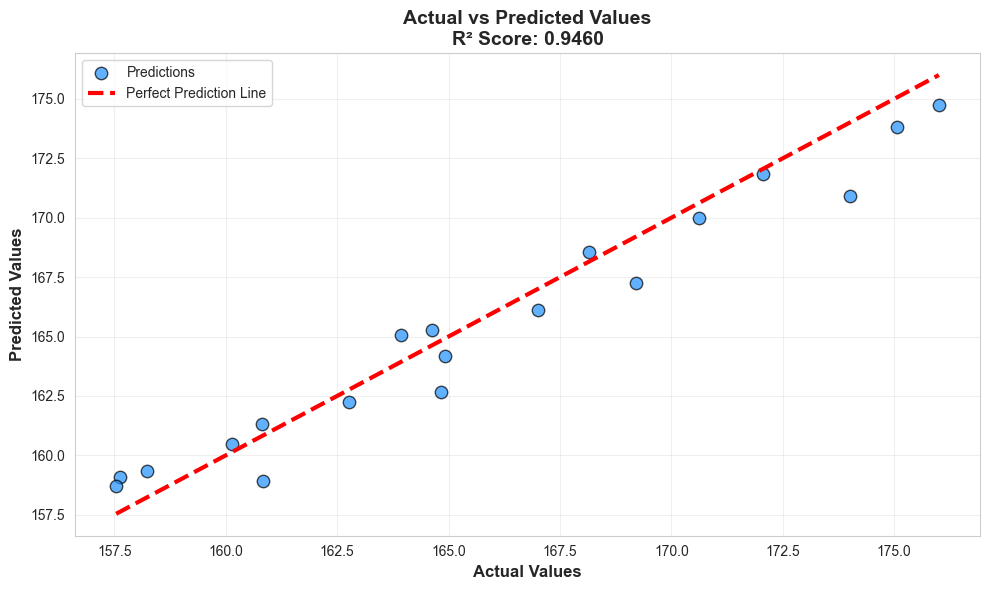

In [20]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, edgecolors='black', s=80, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=3, label='Perfect Prediction Line')

plt.xlabel('Actual Values', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=12, fontweight='bold')
plt.title(f'Actual vs Predicted Values\nR² Score: {r2:.4f}', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

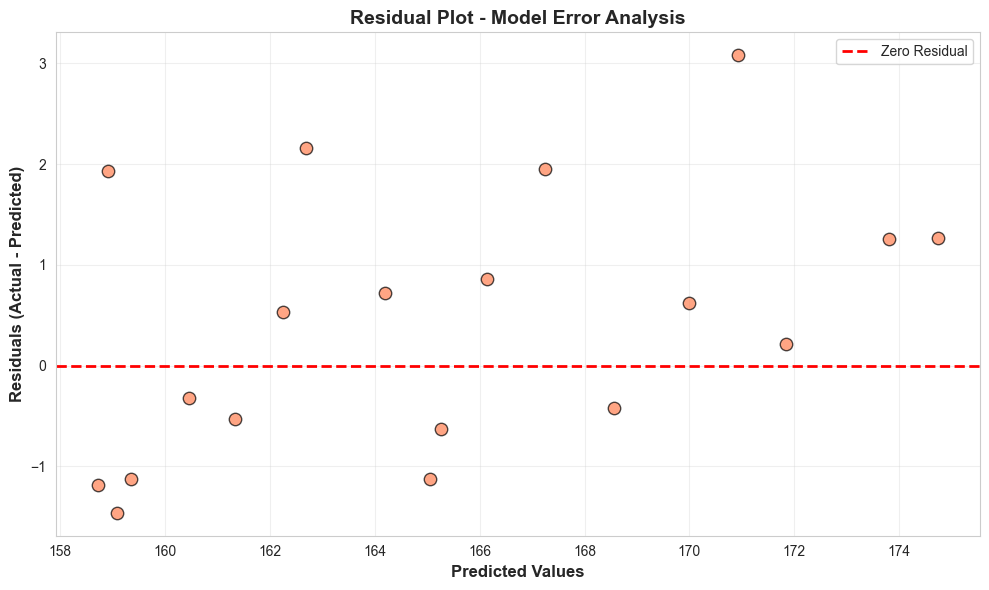

In [21]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='coral', alpha=0.7, edgecolors='black', s=80)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')

plt.xlabel('Predicted Values', fontsize=12, fontweight='bold')
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
plt.title('Residual Plot - Model Error Analysis', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

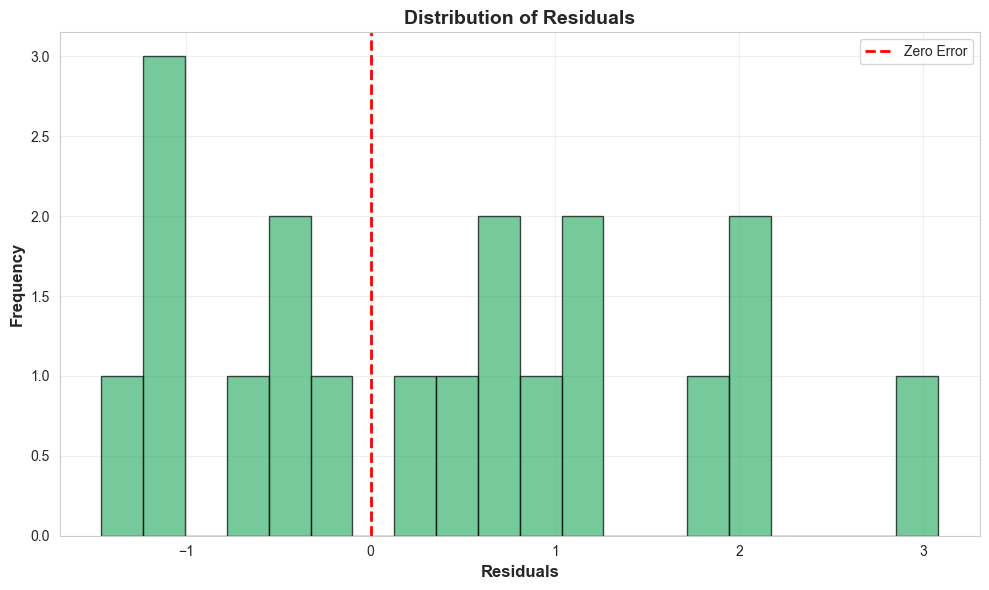

In [22]:
# Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')

plt.xlabel('Residuals', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

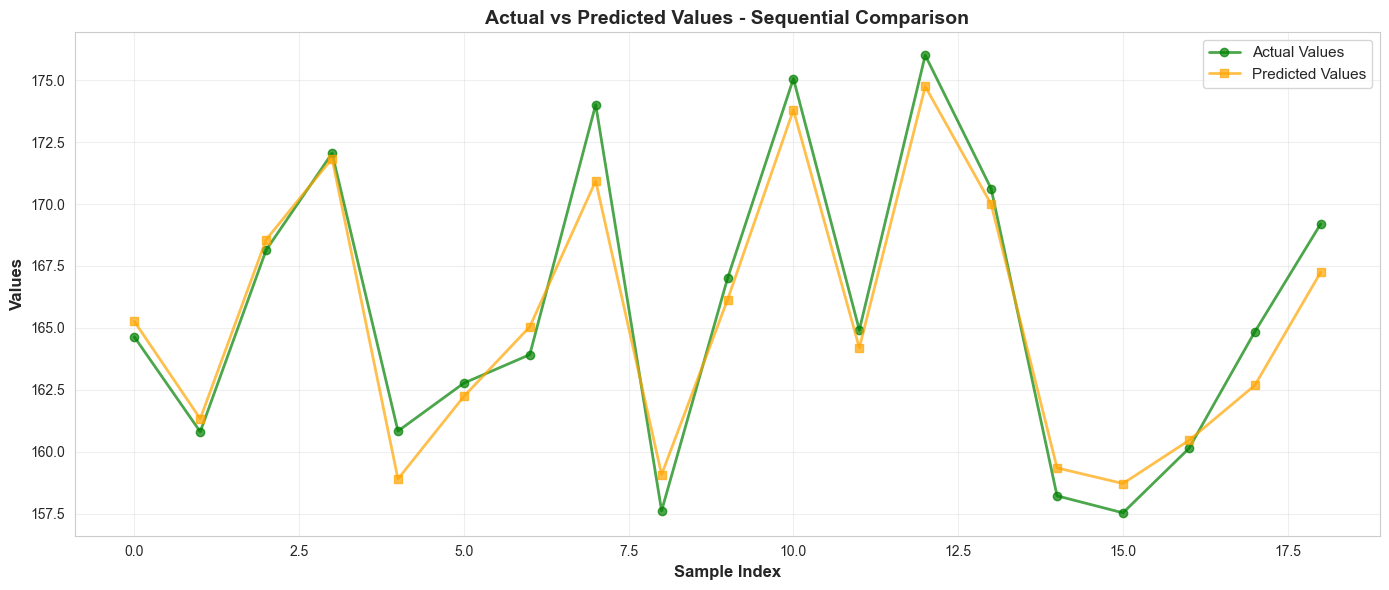

In [23]:
# Predictions vs Actual - Line Plot
plt.figure(figsize=(14, 6))

indices = np.arange(len(y_test))
plt.plot(indices, y_test, 'o-', color='green', label='Actual Values', 
         markersize=6, linewidth=2, alpha=0.7)
plt.plot(indices, y_pred, 's-', color='orange', label='Predicted Values', 
         markersize=6, linewidth=2, alpha=0.7)

plt.xlabel('Sample Index', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('Actual vs Predicted Values - Sequential Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

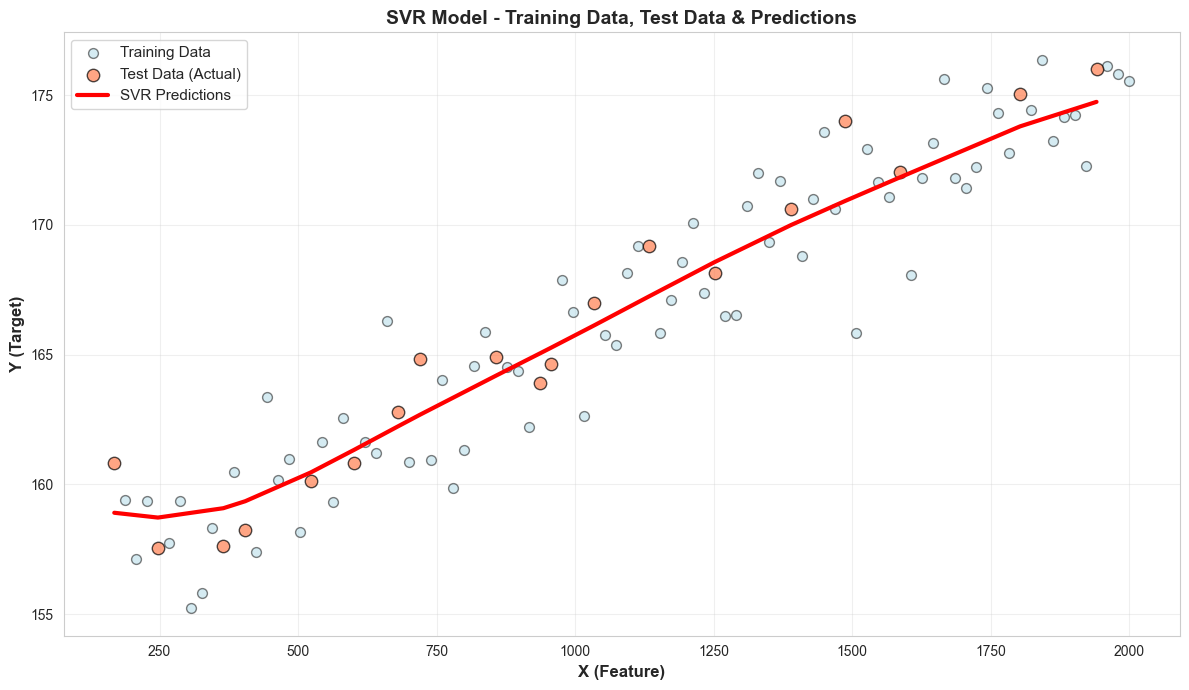

In [24]:
# SVR Decision Boundary Visualization
plt.figure(figsize=(12, 7))

# Plot training data
plt.scatter(X_train, y_train, color='lightblue', alpha=0.5, s=50, 
            edgecolors='black', label='Training Data')

# Plot test data
plt.scatter(X_test, y_test, color='coral', alpha=0.7, s=80, 
            edgecolors='black', label='Test Data (Actual)')

# Plot predictions
sorted_indices = X_test.flatten().argsort()
plt.plot(X_test[sorted_indices], y_pred[sorted_indices], 
         color='red', linewidth=3, label='SVR Predictions', linestyle='-')

plt.xlabel('X (Feature)', fontsize=12, fontweight='bold')
plt.ylabel('Y (Target)', fontsize=12, fontweight='bold')
plt.title('SVR Model - Training Data, Test Data & Predictions', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🎯 Section 8: Prediction Function

In [25]:
def predict_stroke(x_value):
    """
    Predict stroke value for a given x input
    
    Parameters:
    -----------
    x_value : float
        Input feature value
    
    Returns:
    --------
    float
        Predicted target value
    """
    # Reshape and scale input
    x_input = np.array([[x_value]])
    x_scaled = scaler_X.transform(x_input)
    
    # Make prediction
    y_pred_scaled = svr_model.predict(x_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]
    
    return y_pred

print("✓ Prediction function created successfully!")

✓ Prediction function created successfully!


In [26]:
# Example predictions
print("\n🎯 Sample Predictions:\n")
print("="*50)

test_values = [300, 500, 1000, 1500, 1800]

for x_val in test_values:
    prediction = predict_stroke(x_val)
    print(f"Input X = {x_val:>6.2f}  →  Predicted Y = {prediction:>8.4f}")

print("="*50)


🎯 Sample Predictions:

Input X = 300.00  →  Predicted Y = 158.7968
Input X = 500.00  →  Predicted Y = 160.2235
Input X = 1000.00  →  Predicted Y = 165.7468
Input X = 1500.00  →  Predicted Y = 171.0403
Input X = 1800.00  →  Predicted Y = 173.7699


In [27]:
# Custom prediction - You can modify this value
custom_x = 1200.0  # Change this value to make your own prediction

custom_prediction = predict_stroke(custom_x)

print("\n" + "="*60)
print("🔮 CUSTOM PREDICTION")
print("="*60)
print(f"\nInput X Value:      {custom_x}")
print(f"Predicted Y Value:  {custom_prediction:.6f}")
print("\n" + "="*60)


🔮 CUSTOM PREDICTION

Input X Value:      1200.0
Predicted Y Value:  167.996720



---

## 🎉 Project Complete!

### Summary:
- ✅ Data loaded and explored
- ✅ SVR model trained successfully
- ✅ **R² Score and all evaluation metrics displayed**
- ✅ Comprehensive visualizations created
- ✅ Prediction function ready to use

### Key Metrics:
- **R² Score**: Measures how well the model explains variance in the data
- **MAE**: Average prediction error (lower is better)
- **RMSE**: Root mean squared error (penalizes larger errors)
- **MAPE**: Percentage error (easier to interpret)

---